In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.colors as colors
from sklearn import preprocessing
from scipy import misc

Read and display original color image:

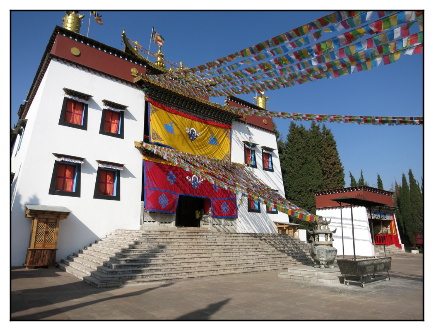

In [2]:
img = misc.imread('IMG_2041.png')
f, ax = plt.subplots(1,1)
ax.imshow(img)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

Next we turn the image into an array and scale it such that we can apply KMeans:

X=[]
for lin in img:
    X.extend(lin)
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X) 

Before the application of scaler every element of X is a list of length 3 containing the rgb-values for a given pixel. Rgb-values that are close to each other (Euclidean metric) are perceived as similar colors. This motivates the idea that we can cluster colors into similar ones by using KMeans. The number of color-clusters is specified by n_clusters:

In [4]:
KM = KMeans(n_clusters = 10)
KM.fit(X)
cluster_colors=KM.cluster_centers_

array([[-0.86565818, -0.25412211,  0.44347398],
       [ 1.86055688,  1.91409035,  1.65945929],
       [-0.9395805 , -0.96284912, -1.04463776],
       [ 0.29044   ,  0.15115857, -0.07679339],
       [-0.32346718,  0.32321265,  0.95247102],
       [ 0.11145355, -1.12758339, -1.11102461],
       [ 0.95277545,  0.87926904,  0.55762417],
       [-0.29605824, -0.39203182, -0.55537757],
       [ 0.90960568,  0.19859595, -1.17397297],
       [-1.38326338, -1.47598252, -1.45827408]])

Colors lying in the same cluster will all be mapped to the same color (=the color of the cluster, given by the respective entry of cluster_colors).

We apply the clustering to the (scaled) colors X, and identify every category by the appropriate cluster color from cluster_colors:

In [5]:
Z = KM.predict(X)
classes = KM.predict(cluster_colors)
cluster_colors = scaler.inverse_transform(cluster_colors)
im_dic={}
for c in range(len(cluster_colors)):
    im_dic[classes[c]] = list(cluster_colors[c])     #contains cluster color for every cluster

In the last step we replace for every pixel in X the corresponding rgb-value by the appropriate cluster color.

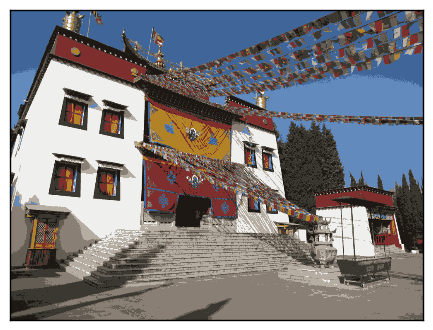

In [7]:

Z_2=[]
for z in Z:
    Z_2.append(im_dic[z])
i=0
img_cc=[]
for s in img:
    H=[]
    for j in s:
        H.append(Z_2[i])
        i+=1
    img_cc.append(H)
img_cc=np.array(img_cc, dtype=np.uint8)
f, ax = plt.subplots(1,1)
ax.imshow(img_cc)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()